In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
a=pd.read_excel("DCA with volve data.xlsx",sheet_name=7,dtype=int)

NameError: name 'pd' is not defined

In [3]:
# Assuming you have x and y data (replace with  actual data)
x =a['months']
y = a['Actual']


# Fit an exponential model (y = a * exp(b * x))
p = np.polyfit(x, np.log(y), 1)
A, B = np.exp(p[1]), p[0]
print(abs(B))
print(f"Equation: y = {A:.2f} * exp({B:.5f} * x)")

0.05019998483738393
Equation: y = 72059.23 * exp(-0.05020 * x)


In [4]:
# Assuming you have x and y data (replace with  actual data)
x =a['months']
y = a['Actual']


# Fit an exponential model (y = a * exp(b * x))
p = np.polyfit(x, np.log(y), 1)
A, B = np.exp(p[1]), p[0]
print(abs(B))
print(f"Equation: y = {A:.2f} * exp({B:.5f} * x)")

#Inserting Coloumns in Data 
a["HOP initial"]=y
a.loc[26:,'HOP initial']=np.nan
a["HOP final"]=y
a.loc[0:24:,'HOP final']=np.nan

#Decline Rate
Di=abs(B)
Di1=0.06016
Di2=0.12783
Di3=0.29488

b=a.iloc[0:,0:1]-1
c=b['months']
d1=c*Di1
d2=c*Di2
d3=c*Di3

#exponential
EXP=(101571)*np.exp(-d1)
#hyperbolic
HYP=(101571)/(1+(0.5*d2))**(1/0.5)
#harmonic
HAR=(101571)/(1+d3)

#Inserting Coloumns in Data
a["Exponential"]=EXP
a["Hyperbolic"]=HYP
a["Harmonic"]=HAR

#error
e1=abs(((y-EXP)/y)*100)
e2=abs(((y-HYP)/y)*100)
e3=abs(((y-HAR)/y)*100)
f=e1.sum()
g=e2.sum()
h=e3.sum()

#Inserting Coloumns in Data
a["ERROR EXP"]=e1
a["sum 1"]=f
a.loc[1:,'sum 1']=np.nan
a["ERROR HYP"]=e2
a["sum 2"]=g
a.loc[1:,'sum 2']=np.nan
a["ERROR HAR"]=e3
a["sum 3"]=h
a.loc[1:,'sum 3']=np.nan

#Inserting Coloumns in Data
a["EXP predicted"]=EXP
a.loc[0:24,'EXP predicted']=np.nan
a["HYP predicted"]=HYP
a.loc[0:24,'HYP predicted']=np.nan
a["HAR predicted"]=HAR
a.loc[0:24,'HAR predicted']=np.nan


0.05019998483738393
Equation: y = 72059.23 * exp(-0.05020 * x)


In [5]:
a.head()

,months,Actual,HOP initial,HOP final,Exponential,Hyperbolic,Harmonic,ERROR EXP,sum 1,ERROR HYP,sum 2,ERROR HAR,sum 3,EXP predicted,HYP predicted,HAR predicted
0,1,101571,101571.0,NaN,101571.000000,101571.000000,101571.000000,0.000000,1807.508764,0.000000,1366.523217,0.000000,1789.381723,NaN,NaN,NaN
1,2,86253,86253.0,NaN,95640.661711,89733.759676,78440.473248,10.883867,NaN,4.035523,NaN,9.057687,NaN,NaN,NaN,NaN
2,3,77113,77113.0,NaN,90056.572963,79851.383148,63890.775966,16.785202,NaN,3.551130,NaN,17.146556,NaN,NaN,NaN,NaN
3,4,69617,69617.0,NaN,84798.517584,71515.972915,53894.112403,21.807199,NaN,2.727743,NaN,22.584839,NaN,NaN,NaN,NaN
4,5,64039,64039.0,NaN,79847.459746,64420.725109,46602.462928,24.685676,NaN,0.596082,NaN,27.227997,NaN,NaN,NaN,NaN


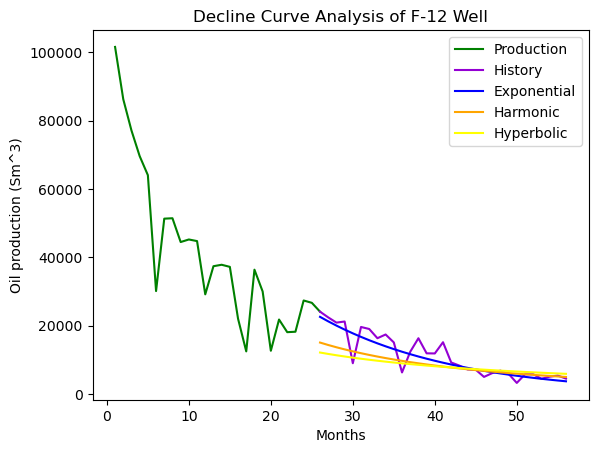

In [6]:
#Plotting 
plt.plot(a["months"],a["HOP initial"],color="green")
plt.plot(a["months"],a["HOP final"],color="darkviolet")
plt.plot(a["months"],a["EXP predicted"],color="blue")
plt.plot(a["months"],a["HYP predicted"],color="orange")
plt.plot(a["months"],a["HAR predicted"],color="yellow")

plt.xlabel('Months')
plt.ylabel('Oil production (Sm^3)')
plt.title('Decline Curve Analysis of F-12 Well')
plt.legend(["Production",'History','Exponential','Harmonic','Hyperbolic'], loc='upper right')

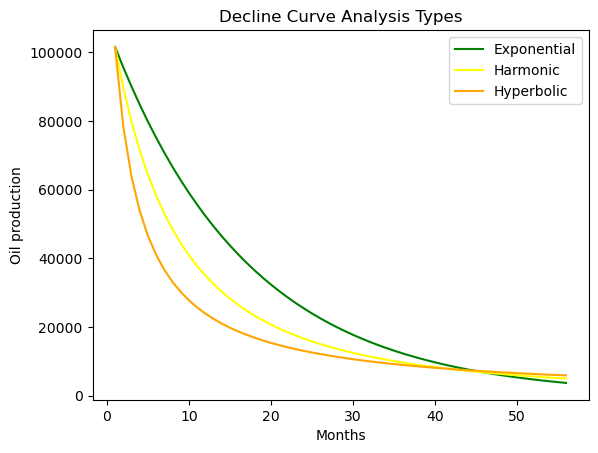

In [7]:
#plotting DCA Types
plt.plot(a["months"],a["Exponential"],color="green")
plt.plot(a["months"],a["Hyperbolic"],color="yellow")
plt.plot(a["months"],a["Harmonic"],color="Orange")

plt.xlabel('Months')
plt.ylabel('Oil production')
plt.title('Decline Curve Analysis Types')
plt.legend(['Exponential','Harmonic','Hyperbolic'], loc='best')

In [11]:
import numpy as np
import pandas as pd
import pulp

# Assuming you have x and y data (replace with actual data)
x = a['months']
y = a['Actual']

# Fit an exponential model (y = a * exp(b * x))
p = np.polyfit(x, np.log(y), 1)
A, B = np.exp(p[1]), p[0]
print(abs(B))
print(f"Equation: y = {A:.2f} * exp({B:.5f} * x)")

# Define the initial decline rate (B) obtained from the exponential model fit
Di = abs(B)

# Define the error functions
def calculate_errors(Di1, Di2, Di3):
    # Decline rates
    d1 = x * Di1
    d2 = x * Di2
    d3 = x * Di3

    # Calculate model predictions
    EXP = (101571) * np.exp(-d1)
    HYP = (101571) / (1 + (0.5 * d2))**(1/0.5)
    HAR = (101571) / (1 + d3)

    # Calculate errors
    e1 = abs(((y - EXP) / y) * 100)
    e2 = abs(((y - HYP) / y) * 100)
    e3 = abs(((y - HAR) / y) * 100)

    # Return the sum of errors for each model
    return e1.sum(), e2.sum(), e3.sum()

# Create a LP minimization problem
problem = pulp.LpProblem("Minimize_Errors", pulp.LpMinimize)

# Define decision variables (decline rates)
Di1 = pulp.LpVariable('Di1', lowBound=0)
Di2 = pulp.LpVariable('Di2', lowBound=0)
Di3 = pulp.LpVariable('Di3', lowBound=0)

# Define the objective function (sum of errors)
f, g, h = calculate_errors(Di1, Di2, Di3)
objective = f + g + h
problem += objective, "Total_Error"

# Solve the LP problem
problem.solve()

# Get the optimal values of Di1, Di2, Di3
optimal_Di1 = Di1.varValue
optimal_Di2 = Di2.varValue
optimal_Di3 = Di3.varValue

print("Optimal Di1:", optimal_Di1)
print("Optimal Di2:", optimal_Di2)
print("Optimal Di3:", optimal_Di3)
print("Optimal Total Error:", pulp.value(objective))

0.05019998483738393
Equation: y = 72059.23 * exp(-0.05020 * x)


TypeError: loop of ufunc does not support argument 0 of type LpAffineExpression which has no callable exp method

In [14]:
import numpy as np
import pandas as pd
import pulp

# Assuming you have x and y data (replace with actual data)
x = a['months']
y = a['Actual']

# Fit an exponential model (y = A * exp(B * x))
p = np.polyfit(x, np.log(y), 1)
A, B = np.exp(p[1]), p[0]
print(abs(B))
print(f"Equation: y = {A:.2f} * exp({B:.5f} * x)")

# Inserting Columns in Data
a["HOP initial"] = y
a.loc[26:, 'HOP initial'] = np.nan
a["HOP final"] = y
a.loc[0:24, 'HOP final'] = np.nan

# Decline Rate
Di = abs(B)
Di1 = 0.06016
Di2 = 0.12783
Di3 = 0.29488

# Create a PuLP LP minimization problem
problem = pulp.LpProblem("Minimize_Error", pulp.LpMinimize)

# Define decision variables Di1, Di2, Di3
Di1_var = pulp.LpVariable('Di1', lowBound=0)
Di2_var = pulp.LpVariable('Di2', lowBound=0)
Di3_var = pulp.LpVariable('Di3', lowBound=0)

# Calculate model predictions with variable decline rates
d1 = x * Di1_var
d2 = x * Di2_var
d3 = x * Di3_var
EXP = (101571) * np.exp(-d1)
HYP = (101571) / (1 + (0.5 * d2))**(1/0.5)
HAR = (101571) / (1 + d3)

# Calculate errors
e1 = abs(((y - EXP) / y) * 100)
e2 = abs(((y - HYP) / y) * 100)
e3 = abs(((y - HAR) / y) * 100)

# Define the objective function: minimize the sum of errors
problem += e1.sum() + e2.sum() + e3.sum(), "Total_Error"

# Solve the LP problem
problem.solve()

# Print the optimized values of Di1, Di2, Di3
print("Optimal Di1:", Di1_var.value())
print("Optimal Di2:", Di2_var.value())
print("Optimal Di3:", Di3_var.value())

0.05019998483738393
Equation: y = 72059.23 * exp(-0.05020 * x)


TypeError: loop of ufunc does not support argument 0 of type LpAffineExpression which has no callable exp method

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Assuming you have x and y data (replace with actual data)
x = a['months']
y = a['Actual']

# Fit an exponential model (y = A * exp(B * x))
p = np.polyfit(x, np.log(y), 1)
A, B = np.exp(p[1]), p[0]
print(abs(B))
print(f"Equation: y = {A:.2f} * exp({B:.5f} * x)")

# Inserting Columns in Data
a["HOP initial"] = y
a.loc[26:, 'HOP initial'] = np.nan
a["HOP final"] = y
a.loc[0:24, 'HOP final'] = np.nan

# Define error functions for each model
def exponential_error(params):
    Di1 = params[0]
    d1 = x * Di1
    EXP = (101571) * np.exp(-d1)
    return np.sum(abs((y - EXP) / y) * 100)

def hyperbolic_error(params):
    Di2 = params[0]
    d2 = x * Di2
    HYP = (101571) / (1 + (0.5 * d2))**(1/0.5)
    return np.sum(abs((y - HYP) / y) * 100)

def harmonic_error(params):
    Di3 = params[0]
    d3 = x * Di3
    HAR = (101571) / (1 + d3)
    return np.sum(abs((y - HAR) / y) * 100)

# Define total error function to minimize
def total_error(params):
    Di1, Di2, Di3 = params
    return exponential_error([Di1]) + hyperbolic_error([Di2]) + harmonic_error([Di3])

# Initial guess for parameters Di1, Di2, Di3
initial_guess = [0.1, 0.2, 0.3]  # Adjust initial values as needed

# Minimize the total error using scipy.optimize.minimize
result = minimize(total_error, initial_guess, method='Nelder-Mead')

# Extract optimized values of Di1, Di2, Di3
Di1_opt, Di2_opt, Di3_opt = result.x

# Print the optimized values
print("Optimal Di1:", Di1_opt)
print("Optimal Di2:", Di2_opt)
print("Optimal Di3:", Di3_opt)

0.05019998483738393
Equation: y = 72059.23 * exp(-0.05020 * x)
Optimal Di1: 0.05902457520522465
Optimal Di2: 0.12261601910341352
Optimal Di3: 0.28875886332223566


NameError: name 'Di2' is not defined